# Preparing To Model 

## Challenge: Preparing a dataset for modeling
by: Melissa N 

Data: [Car Data Sales](https://www.kaggle.com/gagandeep16/car-sales/data)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from IPython.display import display

In [2]:
# Make the scatterplot matrix.

# Setting the default plot aesthetics to be prettier.
sns.set_style("white")

In [3]:
df = pd.read_csv('Car_sales.csv')
display(df.head()) #Not using Print statement so that it displays all in one line for all tables 

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [4]:
df.columns

Index(['Manufacturer', 'Model', 'Sales_in_thousands', '__year_resale_value',
       'Vehicle_type', 'Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency', 'Latest_Launch', 'Power_perf_factor'],
      dtype='object')

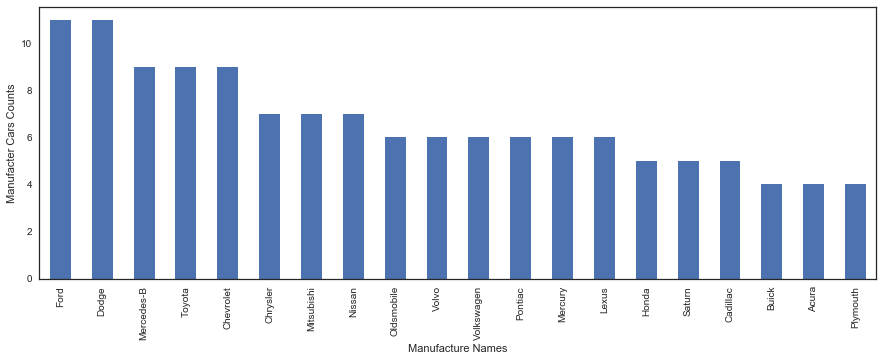

In [5]:
plt.figure(figsize=(15, 5))
df.Manufacturer.value_counts().head(20).plot(kind='bar')
plt.ylabel('Manufacter Cars Counts')
plt.xlabel('Manufacture Names')
plt.show()

We see that that the Manufacturer who makes the most cars in the US is Ford and Dodge, Followed by Toyota, Chevrolet and Mercedes-B.   
Now it will be interesting to see if they are the cars Manufacturers with the most sales or the most expensives cars.   
I will first look at Ford and Dodge and see how the two manufacturers differs or are similar.  

/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:747: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:748: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


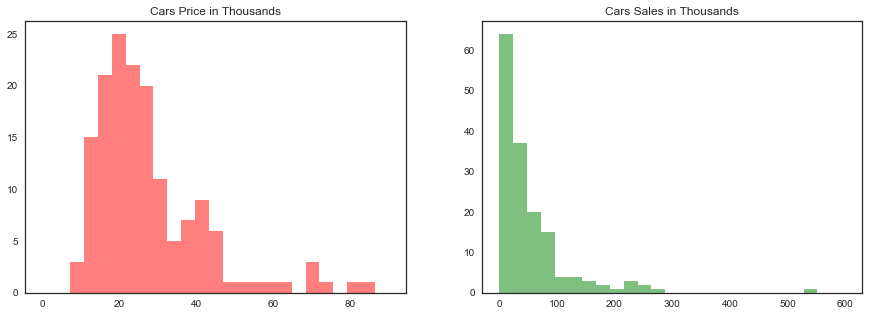

In [6]:
##histogram and boxplot for univariate variable Sales in Thousands

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.hist(df['Price_in_thousands'], range=(0,90), bins=25, color='red', alpha = 0.5)
plt.title('Cars Price in Thousands')
plt.subplot(1, 2, 2)
plt.hist(df['Sales_in_thousands'], range=(0,600), bins=25, color='green', alpha = 0.5)
plt.title('Cars Sales in Thousands')
plt.show()

In [7]:
display(df['Price_in_thousands'].describe()) 

display(df['Sales_in_thousands'].describe())

count    155.000000
mean      27.390755
std       14.351653
min        9.235000
25%       18.017500
50%       22.799000
75%       31.947500
max       85.500000
Name: Price_in_thousands, dtype: float64

count    157.000000
mean      52.998076
std       68.029422
min        0.110000
25%       14.114000
50%       29.450000
75%       67.956000
max      540.561000
Name: Sales_in_thousands, dtype: float64

/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:747: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:748: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


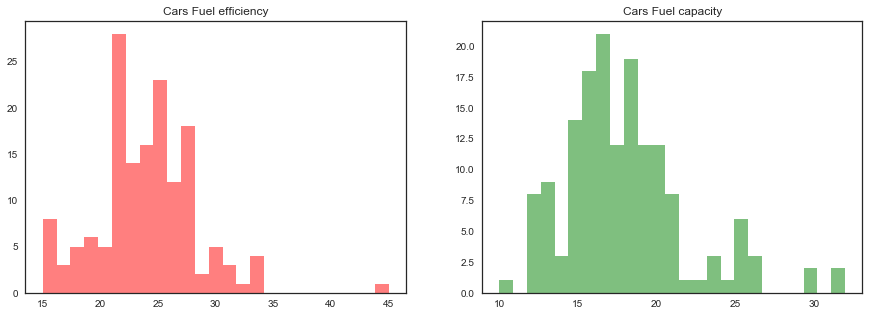

In [8]:
##histogram and boxplot for univariate variable Fuel Efficiency and Fuel Capacity 

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.hist(df['Fuel_efficiency'], range=(15,45), bins=25, color='red', alpha = 0.5)
plt.title('Cars Fuel efficiency')
plt.subplot(1, 2, 2)
plt.hist(df['Fuel_capacity'], range=(10,32), bins=25, color='green', alpha = 0.5)
plt.title('Cars Fuel capacity')
plt.show()

In [9]:
display(df['Fuel_efficiency'].describe()) 

display(df['Fuel_capacity'].describe())

count    154.000000
mean      23.844156
std        4.282706
min       15.000000
25%       21.000000
50%       24.000000
75%       26.000000
max       45.000000
Name: Fuel_efficiency, dtype: float64

count    156.000000
mean      17.951923
std        3.887921
min       10.300000
25%       15.800000
50%       17.200000
75%       19.575000
max       32.000000
Name: Fuel_capacity, dtype: float64

## Using a dataset of your choice, select an outcome variable and then pick four or five other variables (one to two categorical, three to four continuous) to act as the basis for features. Explore the variables using the univariate and bivariate methods you've learned so far.  


### Outcome Variable   
'Sales_in_thousands'

### Categorical Variables   

Manufacturer'  
'Model'  
'Vehicle_type'   

### Continuous Variables    

'Sales_in_thousands'   
__year_resale_value'    
'Price_in_thousands'   
'Fuel_capacity'    
'Fuel_efficiency'   



In [10]:
# Take a subset of the data to make plots clearer.
## selecting the columns I want to work with, and assigning them to a new df called df_I.

df_I = df[['Manufacturer', 'Model', 'Sales_in_thousands', '__year_resale_value',
       'Vehicle_type', 'Price_in_thousands','Fuel_capacity','Fuel_efficiency']].dropna()


In [11]:
display(df_I.head())

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Fuel_capacity,Fuel_efficiency
0,Acura,Integra,16.919,16.360,Passenger,21.50,13.2,28.0
1,Acura,TL,39.384,19.875,Passenger,28.40,17.2,25.0
3,Acura,RL,8.588,29.725,Passenger,42.00,18.0,22.0
4,Audi,A4,20.397,22.255,Passenger,23.99,16.4,27.0
5,Audi,A6,18.780,23.555,Passenger,33.95,18.5,22.0


                     Sales_in_thousands  __year_resale_value  \
Sales_in_thousands             1.000000            -0.278148   
__year_resale_value           -0.278148             1.000000   
Price_in_thousands            -0.255906             0.954039   
Fuel_capacity                  0.136942             0.325113   
Fuel_efficiency               -0.064407            -0.400233   

                     Price_in_thousands  Fuel_capacity  Fuel_efficiency  
Sales_in_thousands            -0.255906       0.136942        -0.064407  
__year_resale_value            0.954039       0.325113        -0.400233  
Price_in_thousands             1.000000       0.405510        -0.480936  
Fuel_capacity                  0.405510       1.000000        -0.808338  
Fuel_efficiency               -0.480936      -0.808338         1.000000  


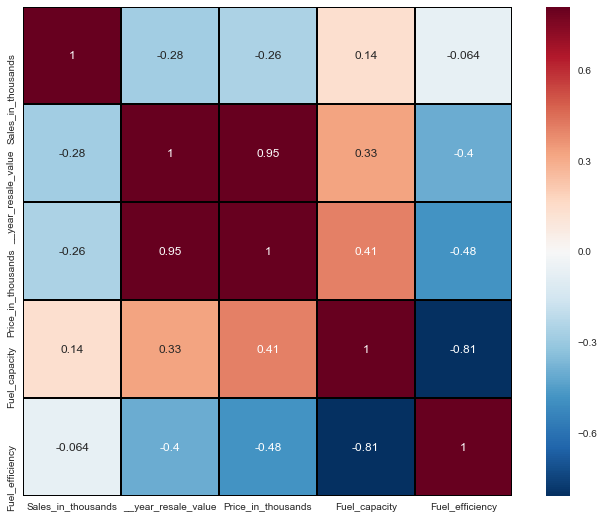

In [12]:
# Make the correlation matrix.
corrmat_I = df_I.corr()
print(corrmat_I)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat_I, vmax=.8, square=True, linecolor='black', linewidths=1, annot=True)
plt.show()

In this we can see that the correlation between __year_resale_value and Price_in_thousands in pretty good at 0.95.  
This makes sense since the price of a car has it leaves the lot and one that is already purchased vary depending on how old the car is.   


Another thing to  note, the correlation between Price_in_thousands and Fuel_capacity is 0.41.  
This is important depending on what the customer needs, small cars may need less fuel than big cars and SUV and this may affect their overall price.      


While the correllation between __year_resale_value and Fuel_capacity is 0.33.   
This is a less than the one noted earlier just because an older car is less expensive than the new cars and thus fuel capacity in this case will not be as high as when buying a new car.  


The Correlation between Fuel_capacity and Fuel_efficiency is -0.81. 
That is because people who what a fuel efficient car will not care about it fuel efficiency and vice-versa.   



In [35]:
# Making dummies.
# Also creating a data frame to hold our features.


features = df.loc[0:len(df),'Manufacturer':'Price_in_thousands']
display(features.head())

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands
0,Acura,Integra,16.919,16.360,Passenger,21.50
1,Acura,TL,39.384,19.875,Passenger,28.40
2,Acura,CL,14.114,18.225,Passenger,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00
4,Audi,A4,20.397,22.255,Passenger,23.99


In [14]:
### Turn Categorical into continuous variable (vehicle type can be turn into binary)
### Department of Transportation's definition of a passenger vehicle, to mean a car or truck, used for passengers, 
### excluding buses and trains.


# Create a better indicator for 'vehicle_type.' Currently it is coded Car and Passenger

features['Truck'] = np.where(df['Vehicle_type']=='Passenger', 0, 1)

# Check to make sure it worked.
print(df['Vehicle_type'].groupby(features['Truck']).describe())

      count unique        top freq
Truck                             
0       116      1  Passenger  116
1        41      1        Car   41


In [15]:
# Create a better indicator for 'vehicle_type.' Currently it is coded Car and Passenger

features['Car'] = np.where(df['Vehicle_type']=='Passenger', 1, 0)

# Check to make sure it worked.
print(df['Vehicle_type'].groupby(features['Car']).describe())

    count unique        top freq
Car                             
0      41      1        Car   41
1     116      1  Passenger  116


In [16]:
### Turn things into categorical variable (fuel efficient Yes or NO or Low Medium High)
### In the US fuel efficiency last year was 23.6 miles per gallon, on average

features['FuelEff_23plus'] = np.where(df['Fuel_efficiency']>=23.6, 1, 0)

# Check to make sure it worked.
print(df['Fuel_efficiency'].groupby(features['FuelEff_23plus']).describe())

                count       mean       std   min   25%   50%   75%   max
FuelEff_23plus                                                          
0                69.0  20.318841  2.470370  15.0  19.0  21.0  22.0  23.0
1                85.0  26.705882  3.157846  24.0  25.0  26.0  27.0  45.0


In [17]:
### Turn things into categorical variable (fuel Capacity SUV, midsize)
### Smaller cars generally have gas tanks that hold 12 gallons worth of gas, 
#while larger cars can hold 15 or 16 gallons.

features['FuelCap_15plus'] = np.where(df['Fuel_capacity']>=15, 1, 0)

# Check to make sure it worked.
print(df['Fuel_capacity'].groupby(features['FuelCap_15plus']).describe())

                count       mean       std   min   25%   50%    75%   max
FuelCap_15plus                                                           
0                27.0  13.133333  1.083087  10.3  12.3  13.2  14.15  14.6
1               129.0  18.960465  3.484730  15.0  16.6  18.5  20.00  32.0


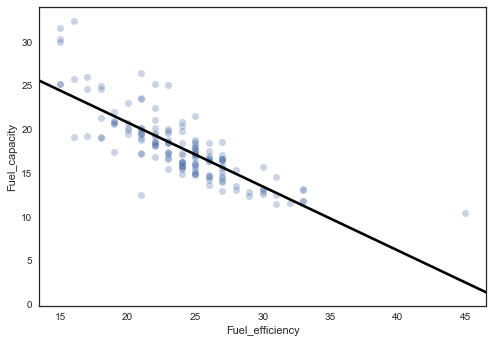

In [18]:
# Find an indicator for 'Distantce Traveled by a car.

### Fuel Efficiency*Fuel Capacity (miles/galon)*galon to see how far you can go on a full gas tank
sns.regplot(
    df['Fuel_efficiency'],
    y=df['Fuel_capacity'],
    y_jitter=.49,
    order=1,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'black'},
    ci=None
)
plt.show()

features['Max_Distance'] = df['Fuel_efficiency'] * df['Fuel_capacity']

It looks like the cars that can travel the most distance on a full gas tank are cars that have a Fuel_efficiency between 22 and 28 and a Fuel_Capacity between 14 and 20.

In [19]:
 ## The cars that don't follow the trend in the data

display(features.loc[
    ((df['Fuel_efficiency'] >= 40)) & (df['Fuel_capacity'] <= 15),
    ['Manufacturer', 'Model','Sales_in_thousands','Price_in_thousands','Truck','Car','Max_Distance']
])


display(features.loc[
    ((df['Fuel_efficiency'] <= 20)) & (df['Fuel_capacity'] >= 30),
    ['Manufacturer', 'Model','Sales_in_thousands','Price_in_thousands','Truck','Car','Max_Distance']
])


,Manufacturer,Model,Sales_in_thousands,Price_in_thousands,Truck,Car,Max_Distance
26,Chevrolet,Metro,21.855,9.235,0,1,463.5


,Manufacturer,Model,Sales_in_thousands,Price_in_thousands,Truck,Car,Max_Distance
18,Cadillac,Escalade,14.785,46.225,1,0,450.0
41,Dodge,Ram Wagon,16.767,21.315,1,0,480.0
42,Dodge,Ram Van,31.038,18.575,1,0,512.0
78,Lincoln,Navigator,22.925,42.660,1,0,450.0


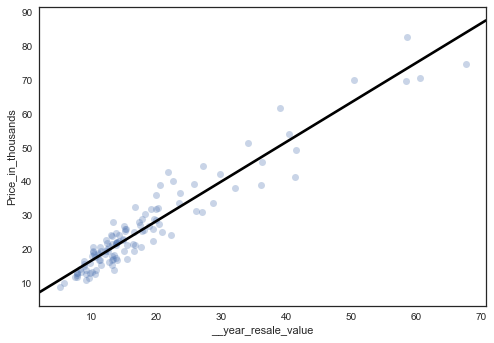

In [20]:
# Find an indicator for Car Depreciation value .
### Year_resale/Price  to see depreciation value of the car 
sns.regplot(
    df['__year_resale_value'],
    y=df['Price_in_thousands'],
    y_jitter=.49,
    order=1,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'black'},
    ci=None
)
plt.show()

features['Vehicle_Depreciation'] = df['__year_resale_value'] / df['Price_in_thousands']

This looks like the vehicle_depreciation increases the more expensive the original price of the car was. 

In [21]:
## These cars are probably hard to sell when they are not new. 
## That is because their Depreciation value is high  
display(features.loc[
    ((features['Price_in_thousands'] >= 50)) & (features['Vehicle_Depreciation'] >= 0.5),
    ['Manufacturer', 'Model','Sales_in_thousands' ,'Price_in_thousands','Truck','Car','Vehicle_Depreciation']
])


,Manufacturer,Model,Sales_in_thousands,Price_in_thousands,Truck,Car,Vehicle_Depreciation
6,Audi,A8,1.380,62.000,0,1,0.629032
39,Dodge,Viper,0.916,69.725,0,1,0.838580
73,Lexus,LS400,6.375,54.005,0,1,0.747616
94,Mercedes-B,S-Class,16.774,69.700,0,1,0.722740
95,Mercedes-B,SL-Class,3.311,82.600,0,1,0.709443
125,Porsche,Carrera Coupe,1.280,71.020,0,1,0.853633
126,Porsche,Carrera Cabrio,1.866,74.970,0,1,0.901027
144,Toyota,Land Cruiser,9.835,51.728,1,0,0.658831


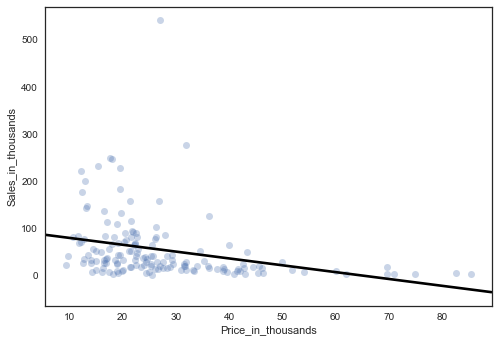

In [22]:
# Find an indicator for Revenue from Sales of new cars .
### Sales in Thousands * Price in Thousands ===> Amount of money gotten from sales 
sns.regplot(
    df['Price_in_thousands'],
    y=df['Sales_in_thousands'],
    y_jitter=.49,
    order=1,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'black'},
    ci=None
)
plt.show()

features['Sales_Revenue_New'] = df['Sales_in_thousands'] * df['Price_in_thousands']

This looks like the car that are the most sold are cars that have a price tag that is less that 50 thousands and at about a maximum of 100 thousands units.    

But there are a few cars in this same categories that have more than 200 thousands units sold. 


In [23]:
display(features.loc[
    ((features['Sales_in_thousands'] >= 200)) & (features['Price_in_thousands'] <= 50),
    ['Manufacturer', 'Model','Sales_in_thousands' ,'Price_in_thousands','Truck','Car','Sales_Revenue_New']
])

,Manufacturer,Model,Sales_in_thousands,Price_in_thousands,Truck,Car,Sales_Revenue_New
40,Dodge,Ram Pickup,227.061,19.460,1,0,4418.607060
49,Ford,Taurus,245.815,17.885,0,1,4396.401275
52,Ford,Explorer,276.747,31.930,1,0,8836.531710
55,Ford,Ranger,220.650,12.050,1,0,2658.832500
56,Ford,F-Series,540.561,26.935,1,0,14560.010535
58,Honda,Accord,230.902,15.350,0,1,3544.345700
137,Toyota,Camry,247.994,17.518,0,1,4344.358892


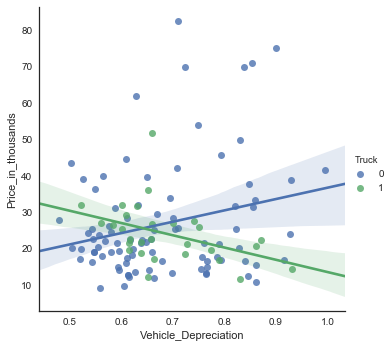

In [24]:
# Create an interaction.
features['Truck_Depreciation'] = features['Vehicle_Depreciation'] * features['Truck']

# A plot of an interaction.
# Add the 'tvtot' feature to the features data frame for plotting.
features['Price_in_thousands'] = df['Price_in_thousands']
sns.lmplot(
    x='Vehicle_Depreciation',
    y='Price_in_thousands',
    hue='Truck',
    data=features,
    scatter=True
)
plt.show()

For Trucks, 
as the original sales price decrease the depreciation decreases.   

The majority of the trucks have a Price tag that is less than 30 thousand per unit.  

In [38]:
display(features.loc[
    ((features['Vehicle_Depreciation'] >= 0.5)) & (features['Price_in_thousands'] >= 30) & (features['Truck_Depreciation'] >= 0.5),
    ['Manufacturer', 'Model','Sales_in_thousands' ,'Price_in_thousands','Truck','Truck_Depreciation']
])

KeyError: 'Vehicle_Depreciation'

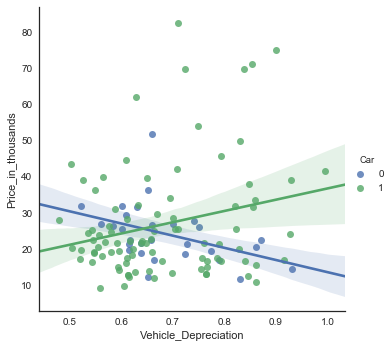

In [26]:
# Create an interaction.
features['Car_Depreciation'] = features['Vehicle_Depreciation'] * features['Car']

# A plot of an interaction.
sns.lmplot(
    x='Vehicle_Depreciation',
    y='Price_in_thousands',
    hue='Car',
    data=features,
    scatter=True
)
plt.show()

For Cars, 
as the original sales price increases the depreciation decreases.

The majority of the cars have a Price tag that is less than  50 thousand per unit.

In [37]:
display(features.loc[
    ((features['Vehicle_Depreciation'] >= 0.5)) & (features['Price_in_thousands'] >= 50) & (features['Car_Depreciation'] >= 0.5),
    ['Manufacturer', 'Model','Sales_in_thousands' ,'Price_in_thousands','Car','Car_Depreciation']
])

KeyError: 'Vehicle_Depreciation'

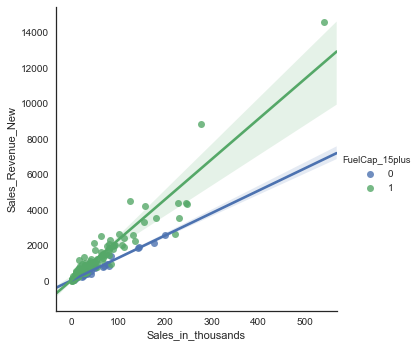

In [28]:
# Create an interaction.
features['CAP_Value'] = features['Sales_Revenue_New'] * features['FuelCap_15plus']

# A plot of an interaction.
sns.lmplot(
    x='Sales_in_thousands',
    y='Sales_Revenue_New',
    hue='FuelCap_15plus',
    data=features,
    scatter=True
)
plt.show()

The relative price of car that have Fuel Capacity higher than 15 is higher than the one with low Fuel Capacity. 

In [29]:
display(features.loc[
    ((features['Sales_Revenue_New'] >= 5000)) & (features['Sales_in_thousands'] >= 200),
    ['Manufacturer', 'Model','Sales_in_thousands' ,'Price_in_thousands','Car','Truck','CAP_Value','Sales_Revenue_New']
])

,Manufacturer,Model,Sales_in_thousands,Price_in_thousands,Car,Truck,CAP_Value,Sales_Revenue_New
52,Ford,Explorer,276.747,31.930,0,1,8836.531710,8836.531710
56,Ford,F-Series,540.561,26.935,0,1,14560.010535,14560.010535


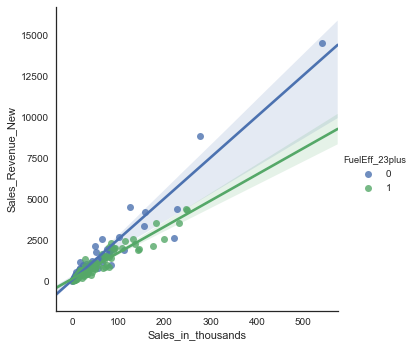

In [30]:
# Create an interaction.
features['EFF_Value'] = features['Sales_Revenue_New'] * features['FuelEff_23plus']

# A plot of an interaction.
# Add the 'tvtot' feature to the features data frame for plotting.
sns.lmplot(
    x='Sales_in_thousands',
    y='Sales_Revenue_New',
    hue='FuelEff_23plus',
    data=features,
    scatter=True
)
plt.show()

The relative price of car that have Fuel Efficiency higher than 23 is lower than the one with low Fuel Efficiency. 

In [31]:
display(features.loc[
    ((features['Sales_Revenue_New'] >= 5000)) & (features['Sales_in_thousands'] >= 200),
    ['Manufacturer', 'Model','Sales_in_thousands' ,'Price_in_thousands','Car','Truck','EFF_Value','Sales_Revenue_New']
])

,Manufacturer,Model,Sales_in_thousands,Price_in_thousands,Car,Truck,EFF_Value,Sales_Revenue_New
52,Ford,Explorer,276.747,31.930,0,1,0.0,8836.531710
56,Ford,F-Series,540.561,26.935,0,1,0.0,14560.010535


## Use filtering methods to select the five best features and justify your choices.

In [32]:
# Take a subset of the data to make plots clearer.
## selecting the columns I want to work with for features, and assigning them to a new df called df_F.

df_F = features[[ 'FuelEff_23plus', 'FuelCap_15plus', 'Truck',
       'Max_Distance','Sales_Revenue_New','Truck_Depreciation','Car_Depreciation','Vehicle_Depreciation',
                 'EFF_Value', 'CAP_Value', 'Sales_in_thousands']].dropna()

In [33]:
display(df_F.head())

,FuelEff_23plus,FuelCap_15plus,Truck,Max_Distance,Sales_Revenue_New,Truck_Depreciation,Car_Depreciation,Vehicle_Depreciation,EFF_Value,CAP_Value,Sales_in_thousands
0,1,0,0,369.6,363.75850,0.0,0.760930,0.760930,363.75850,0.00000,16.919
1,1,1,0,430.0,1118.50560,0.0,0.699824,0.699824,1118.50560,1118.50560,39.384
3,0,1,0,396.0,360.69600,0.0,0.707738,0.707738,0.00000,360.69600,8.588
4,1,1,0,442.8,489.32403,0.0,0.927678,0.927678,489.32403,489.32403,20.397
5,0,1,0,407.0,637.58100,0.0,0.693814,0.693814,0.00000,637.58100,18.780


                      FuelEff_23plus  FuelCap_15plus     Truck  Max_Distance  \
FuelEff_23plus              1.000000       -0.405949 -0.495332     -0.033905   
FuelCap_15plus             -0.405949        1.000000  0.265600      0.254109   
Truck                      -0.495332        0.265600  1.000000      0.113800   
Max_Distance               -0.033905        0.254109  0.113800      1.000000   
Sales_Revenue_New          -0.114885        0.140983  0.315299      0.144909   
Truck_Depreciation         -0.479434        0.262081  0.986750      0.076464   
Car_Depreciation            0.440513       -0.303393 -0.942017     -0.080107   
Vehicle_Depreciation       -0.051129       -0.141277  0.009588     -0.018479   
EFF_Value                   0.584157       -0.057392 -0.255596      0.099140   
CAP_Value                  -0.175591        0.293621  0.349783      0.180008   
Sales_in_thousands          0.007468        0.019864  0.280795      0.120703   

                      Sales_Revenue_New

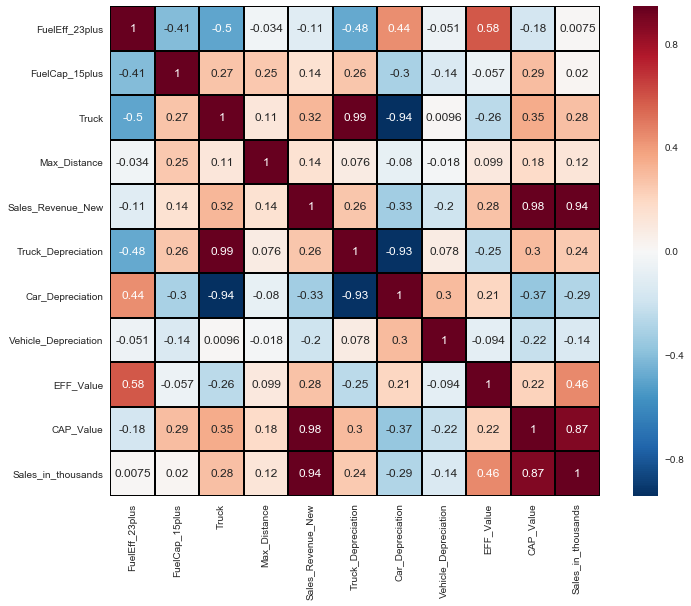

In [34]:
# Make the correlation matrix.
corrmat_F = df_F.corr()
print(corrmat_F)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat_F, vmax=.8, square=True, linecolor='black', linewidths=1, annot=True)
plt.show()

According to the Correlation matrix, the Sales_in_thousands, 

It has a CAP_Value correlation of 0.87. Note: 'CAP_Value' = 'Sales_Revenue_New' * 'FuelCap_15plus'     

It has a EFF_value correlation of 0.46. Note: 'EFF_Value' = 'Sales_Revenue_New' * 'FuelEff_23plus'          

It has a Truck_Depreciation correlation of 0.24. Note: 'Truck_Depreciation' = 'Vehicle_Depreciation' * 'Truck'     

It has a Sales_Revenue_New correlation of 0.94. Note: 'Sales_Revenue_New' = 'Sales_in_thousands' *'Price_in_thousands' 

It has a Max_Distance correlation of 0.12. Note: 'Max_Distance' = 'Fuel_efficiency' * 'Fuel_capacity'        

It has a Truck correlation of 0.28. Note: 'Truck' = np.where(df['Vehicle_type']=='Passenger', 0, 1)       

One thing to take into consideration is that some of those new features have the Sales_in_thousands in how we calculate them. Probably one some of them are very high.   




## The five best features and justify your choices.

Looking at this I believe the good features are in no particular order: Truck_Depreciation, Truck, EFF_Value, CAP_Value, Sales_Revenue_New.